Insurance Premium Prediction

1. Problem Statement

The goal of this project is to give people an estimate of how much they need based on their individual health situation. After that, customers can work with any health insurance carrier and its plans and perks while keeping the projected cost from our study in mind. This can assist a person in concentrating on the health side of an insurance policy rather han the ineffective part.



2. Data Collection

 Dataset Source:https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction .
 The data consists of 1338 rows and 7 columns.

2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warning Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [5]:
df= pd.read_csv(r'C:\MLProject\Notebook\insurance.csv')

In [6]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [7]:

df.shape

(1338, 7)

2.2 Dataset Information

The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region). 

3.1 Checking Missing Values

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

Observation: There are no missing values in the data set.

3.2 Checking Duplicates

In [9]:
df.duplicated().sum()

1

Let us drop the the duplicate values from the dataframe

In [10]:
df.loc[df.duplicated(keep='first'), :]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [11]:
df.loc[df.duplicated(keep='last'), :]

,age,sex,bmi,children,smoker,region,expenses
195,19,male,30.6,0,no,northwest,1639.56


In [12]:
df.loc[df.duplicated(keep=False), :]

,age,sex,bmi,children,smoker,region,expenses
195,19,male,30.6,0,no,northwest,1639.56
581,19,male,30.6,0,no,northwest,1639.56


In [13]:
df=df.drop_duplicates()

In [14]:
df.shape

(1337, 7)

3.3 To check data types

In [15]:
# Checking Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [16]:
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [17]:
df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


In [18]:
# Let us see more statiscal information of the categorical features 
df.describe(include="O")

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [20]:
df.corr()

ValueError: could not convert string to float: 'female'

In [21]:
df.cov()

ValueError: could not convert string to float: 'female'

In [22]:
df.skew()

TypeError: could not convert string to float: 'female'

3.6 Exploring Data 

In [23]:
print("Categories in 'sex' variable:   ",end=" ")
print(df['sex'].unique())
print(df.sex.value_counts())

print("Categories in 'smoker' variable:   ",end=" ")
print(df['smoker'].unique())
print(df.smoker.value_counts())

print("Categories in 'region' variable:   ",end=" ")
print(df['region'].unique())
print(df.region.value_counts())


Categories in 'sex' variable:    ['female' 'male']
sex
male      675
female    662
Name: count, dtype: int64
Categories in 'smoker' variable:    ['yes' 'no']
smoker
no     1063
yes     274
Name: count, dtype: int64
Categories in 'region' variable:    ['southwest' 'southeast' 'northwest' 'northeast']
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


In [24]:
# To define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical_features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['age', 'bmi', 'children', 'expenses']

We have 3 categorical_features : ['sex', 'smoker', 'region']



3.7 Data Visualization

Let us visualize the distribution of values in some columns of the dataset and the relationships between "expenses" and other columns to make some conclusion.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization.




The following settings will improve the default style and font sizes for our charts.

In [21]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [22]:
df['age'].idxmin()

1

In [23]:
df['age'][df['age'].idxmin()]

18

In our dataset we can see that minimum age of the custormer present in our dataframe is 18 years.

In [24]:
df['age'].idxmax()

62

In [25]:
df['age'][df['age'].idxmax()]

64

In our dataset we can see that maximum age of the custormer present in our dataframe is 64 years.

 Age

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram  and a box plot. 

<AxesSubplot:xlabel='age', ylabel='count'>

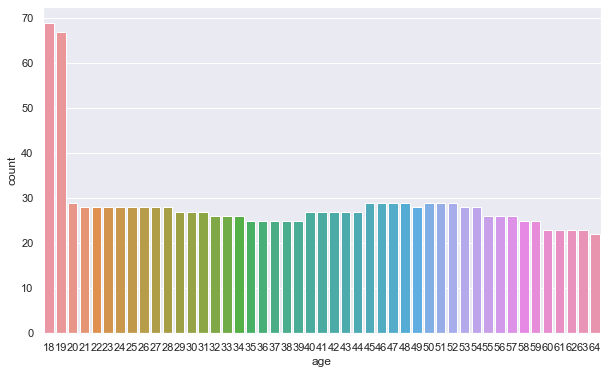

In [26]:
sns.countplot(df['age'])

The distribution of ages in the dataset is almost uniform, with 20-28 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'expenses'}>]], dtype=object)

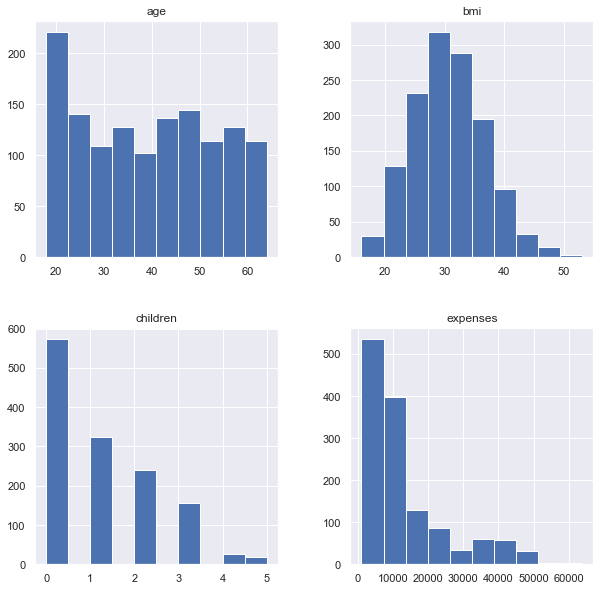

In [27]:
df.hist(bins=10,figsize=(10,10))

The distribution of ages in the dataset is almost uniform, with 20-28 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages.
The measurements of body mass index seem to form a Gaussian distribution centered around the value 30.
In our dataset we can see that maximum number of customer does not have any children and around 3% to 5% of the customers are having 4 to 5 children.
For most customers, the expenses are under 10k. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases.


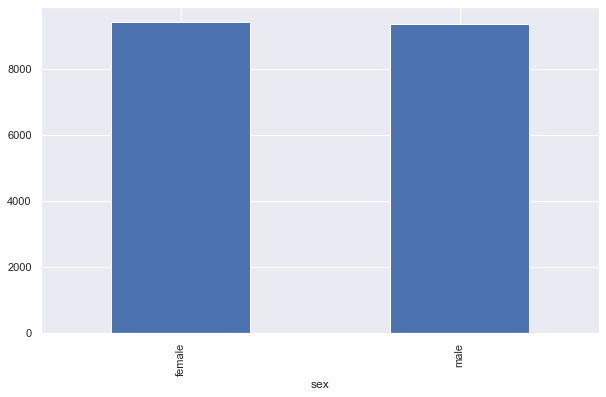

In [28]:
df.groupby("sex")['expenses'].median().plot.bar()
plt.show()


From the above graph we can say that

* There is a significant difference in expenses between male and female. While the median for male and female is almost same but upper fence for male is 42k, the upper fence for female is close to 28k.

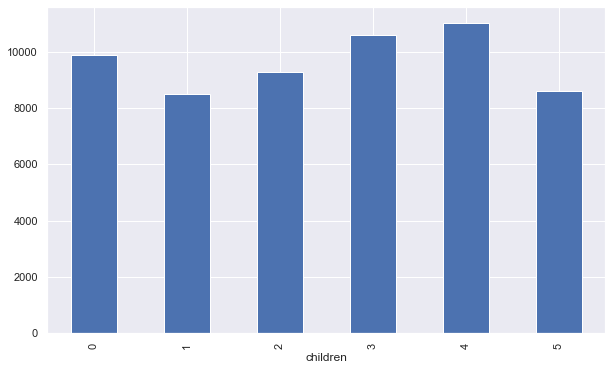

In [29]:
df.groupby("children")['expenses'].median().plot.bar()
plt.show()

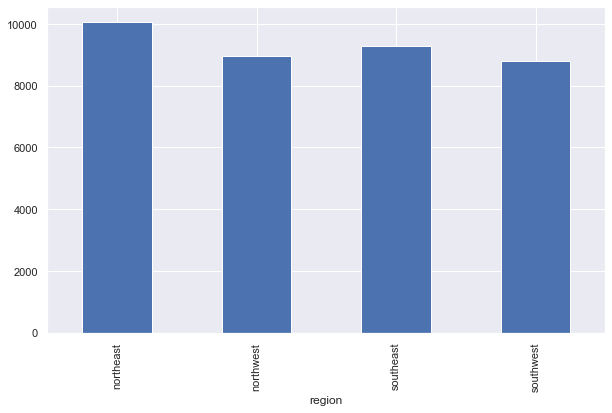

In [30]:
df.groupby("region")['expenses'].median().plot.bar()
plt.show()

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='children', ylabel='age'>,
        <AxesSubplot:xlabel='expenses', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='children', ylabel='bmi'>,
        <AxesSubplot:xlabel='expenses', ylabel='bmi'>],
       [<AxesSubplot:xlabel='age', ylabel='children'>,
        <AxesSubplot:xlabel='bmi', ylabel='children'>,
        <AxesSubplot:xlabel='children', ylabel='children'>,
        <AxesSubplot:xlabel='expenses', ylabel='children'>],
       [<AxesSubplot:xlabel='age', ylabel='expenses'>,
        <AxesSubplot:xlabel='bmi', ylabel='expenses'>,
        <AxesSubplot:xlabel='children', ylabel='expenses'>,
        <AxesSubplot:xlabel='expenses', ylabel='expenses'>]], dtype=object)

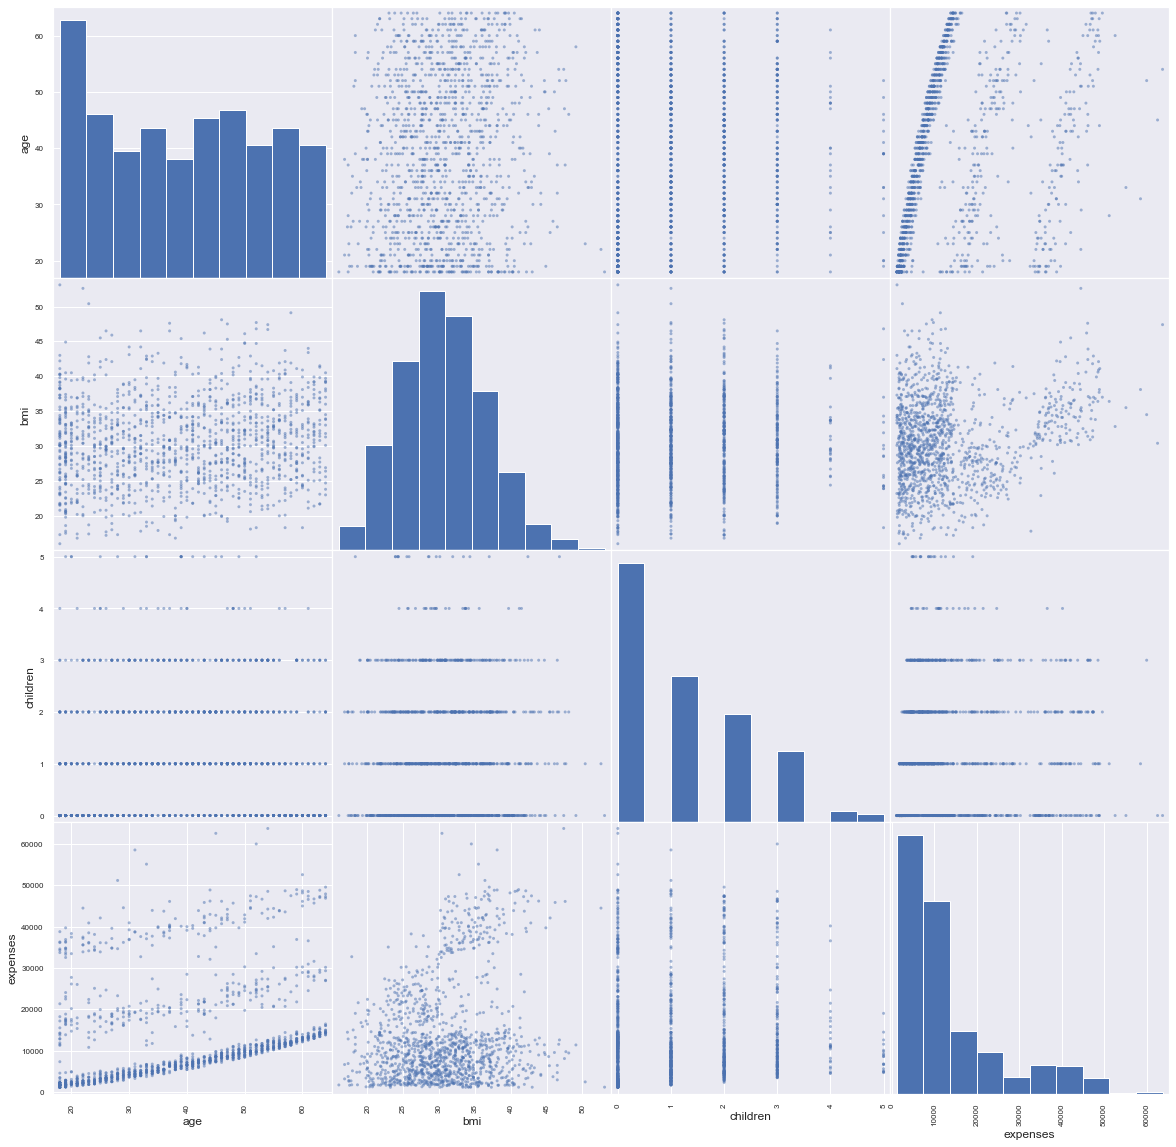

In [31]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (20,20))



Correlation

In [25]:
df.corr()

ValueError: could not convert string to float: 'female'

Text(0.5, 1.0, 'Correlation Matrix')

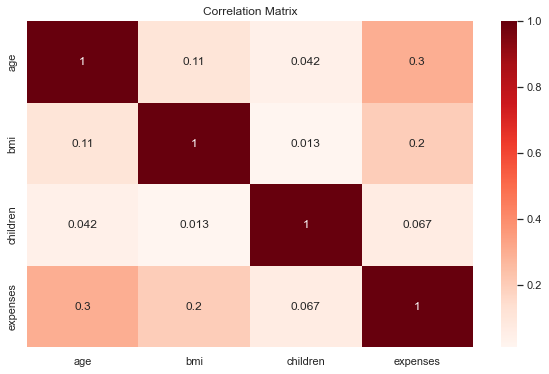

In [33]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

Correlation: Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features X and Y can be correlated if X causes Y or if Y causes X, or if both are caused independently by some other factor Z, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that X are Y simply appear to be correlated because the sample is too small. 

As you can tell from the analysis, the values in some columns are more closely related to the values in "expenses" compared to other columns. E.g. "age" and "expenses" seem to grow together, whereas "bmi" and "expenses" don't.

This relationship is often expressed numerically using a measure called the _correlation coefficient_, which can be computed using the `.corr` method of a Pandas series.

In [26]:
df.expenses.corr(df.age)

0.2983082112316944

In [27]:
df.expenses.corr(df.bmi)

0.19863713145786804

To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [36]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = df.smoker.map(smoker_values)
df.expenses.corr(smoker_numeric)

0.7872343667298227

Here's how correlation coefficients can be interpreted:

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.


* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually 

![]("https://i.imgur.com/3XUpDlw.png")

The correlation coefficient has the following formula:

<img src="https://i.imgur.com/unapugP.png" width="360">

Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.

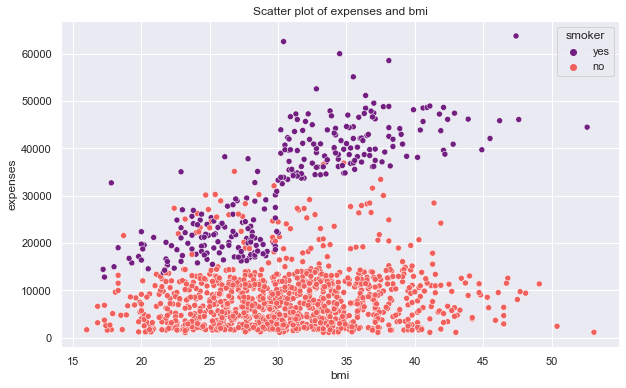

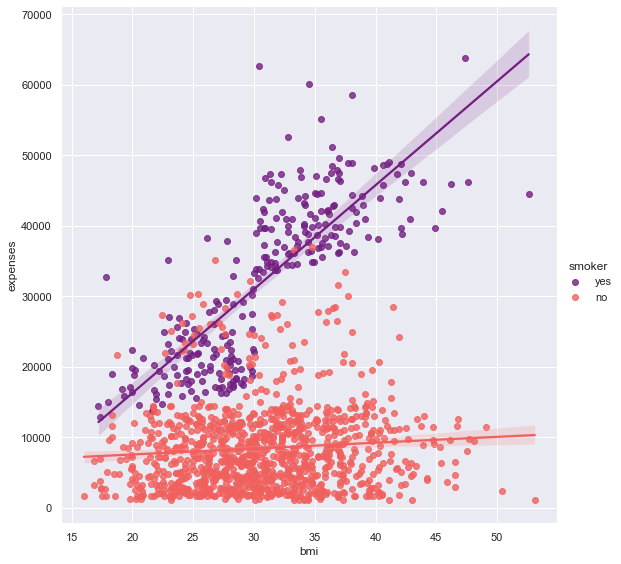

In [37]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='expenses',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of expenses and bmi')

sns.lmplot(x="bmi", y="expenses", hue="smoker", data=df, palette = 'magma', size = 8)

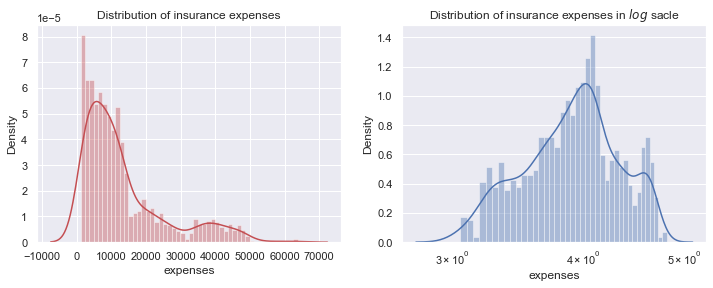

In [38]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['expenses'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance expenses')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['expenses']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance expenses in $log$ sacle')
ax.set_xscale('log');


In the 1st plot we can observe that, the plot is right skewed. In 2nd plot we have applied the natural log, then plot approximately tends to normal. For further analysis we will apply log on target variable charges.

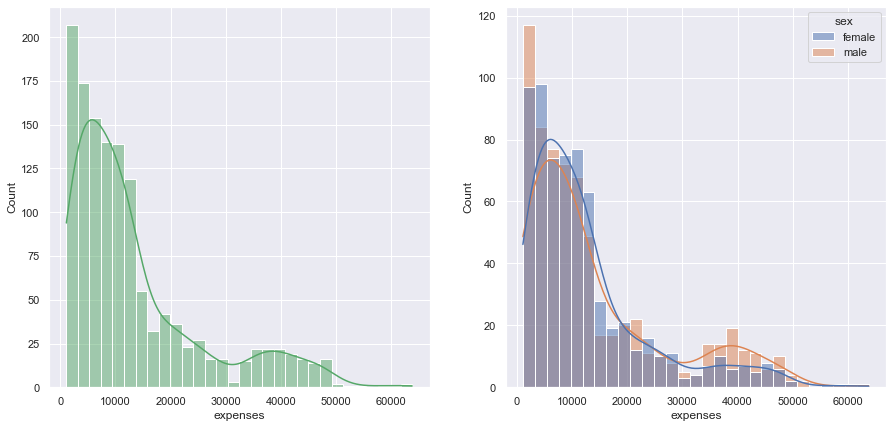

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='expenses',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='expenses',kde=True,hue='sex')
plt.show()

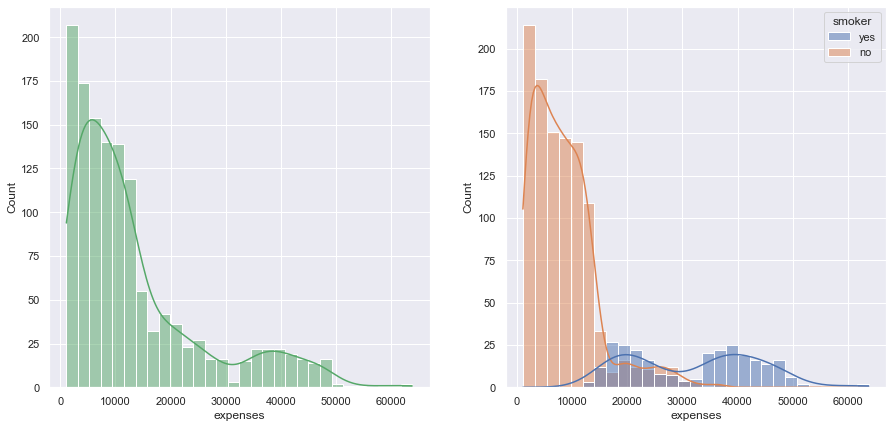

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='expenses',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='expenses',kde=True,hue='smoker')
plt.show()

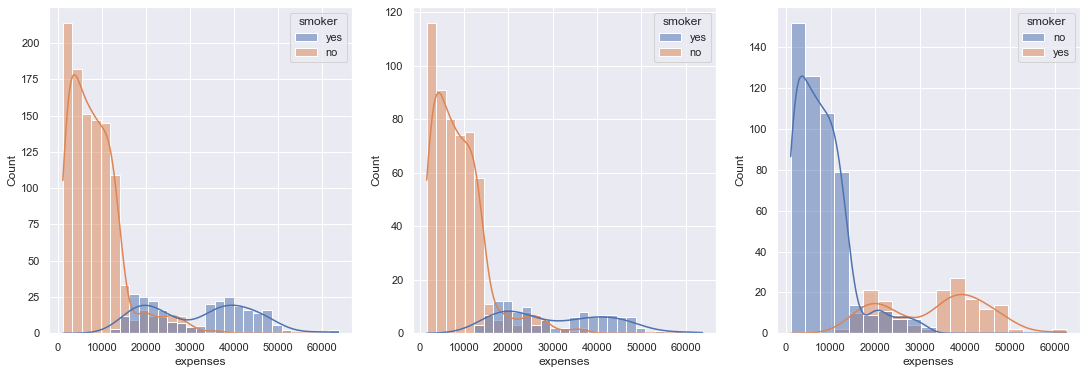

In [41]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='expenses',kde=True,hue='smoker')
plt.subplot(142)
sns.histplot(data=df[df.sex=='female'],x='expenses',kde=True,hue='smoker')
plt.subplot(143)
sns.histplot(data=df[df.sex=='male'],x='expenses',kde=True,hue='smoker')
plt.show()

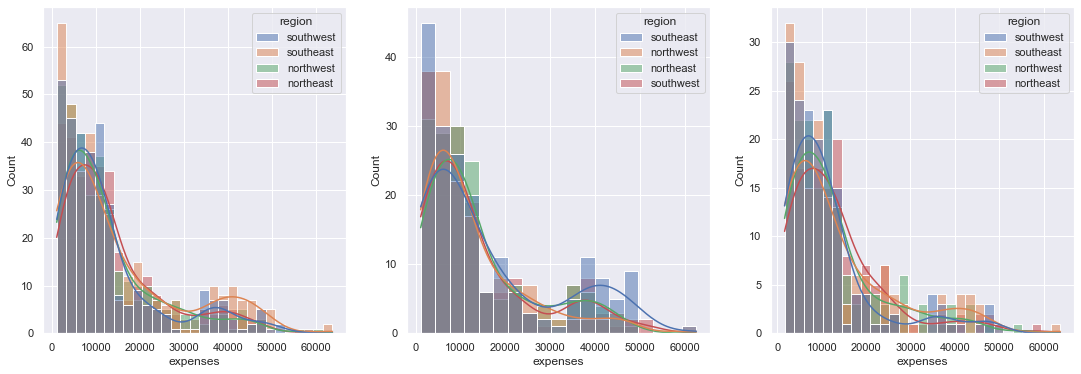

In [42]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='expenses',kde=True,hue='region')
plt.subplot(142)
ax =sns.histplot(data=df[df.sex=='male'],x='expenses',kde=True,hue='region')
plt.subplot(143)
ax =sns.histplot(data=df[df.sex=='female'],x='expenses',kde=True,hue='region')
plt.show()

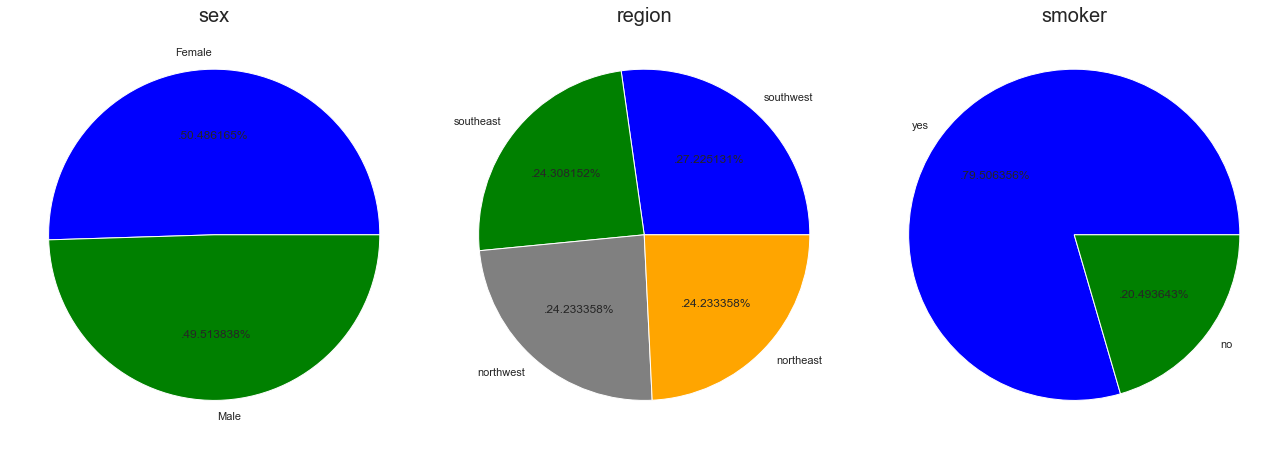

In [43]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['sex'].value_counts()
labels = 'Female', 'Male'
color = ['blue','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('sex', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['region'].value_counts()
labels = 'southwest', 'southeast', 'northwest','northeast'
color = ['blue','green','gray','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('region', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['smoker'].value_counts()
labels = 'yes', 'no'
color = ['blue','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('smoker', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()


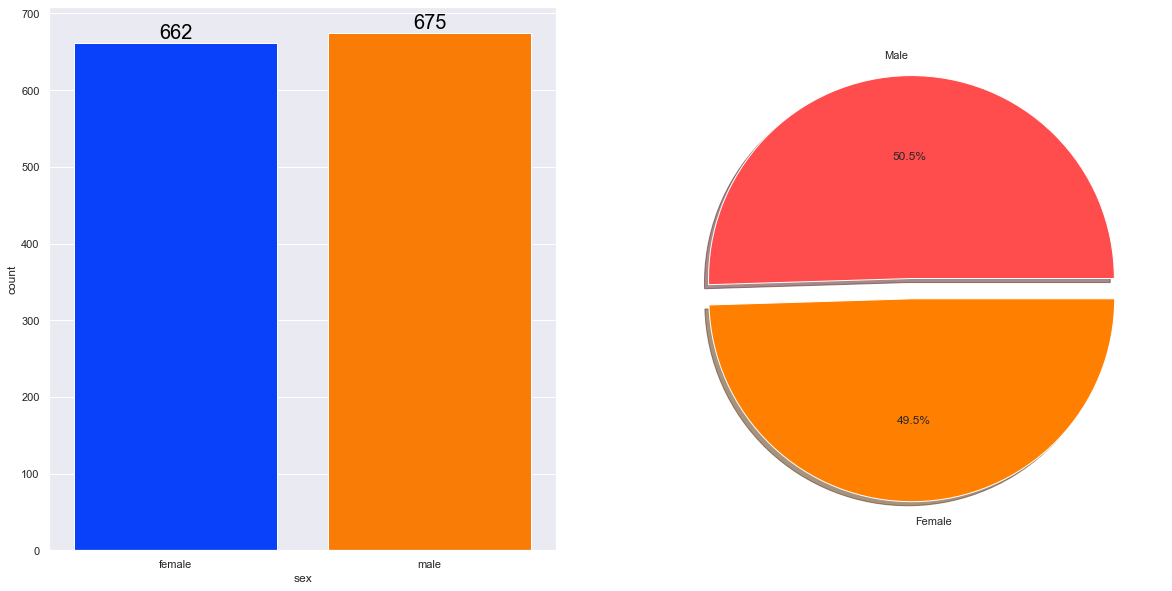

In [44]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['sex'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['sex'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights 
- Sex has balanced data with female customers are 662 (49.5%) and male customers are 675 (50.5%)

In [45]:
gender_group = df.groupby('sex').mean()
gender_group

,age,bmi,children,expenses
sex,,,,
female,39.503021,30.379758,1.074018,12569.578897
male,38.946667,30.945778,1.117037,13974.999111


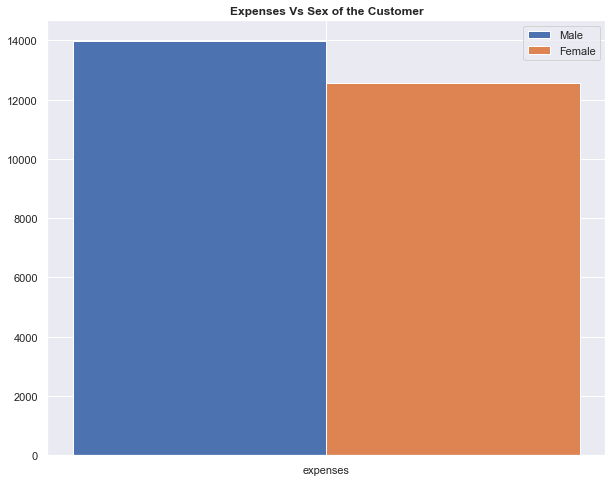

In [46]:
plt.figure(figsize=(10, 8))

X = ['expenses']


female_customer = [gender_group['expenses'][0]]
male_customer = [gender_group['expenses'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_customer, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_customer, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)

plt.title("Expenses Vs Sex of the Customer", fontweight='bold')
plt.legend()
plt.show()

From the above graph we can say that Male customers has got more medical expenses than the female.

### Smoker

Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.
Depending on the smoker condition does it has got any impact on expenses.

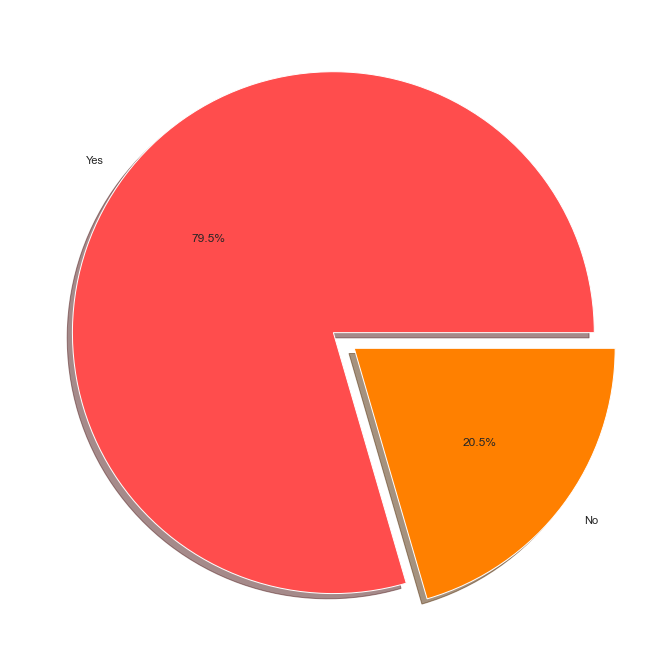

In [47]:
plt.pie(x=df['smoker'].value_counts(),labels=['Yes','No'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

From the above graph we make some observations.

*Maximum numbers of customer around 79.5% present in the dataset have repoted that they smoke.

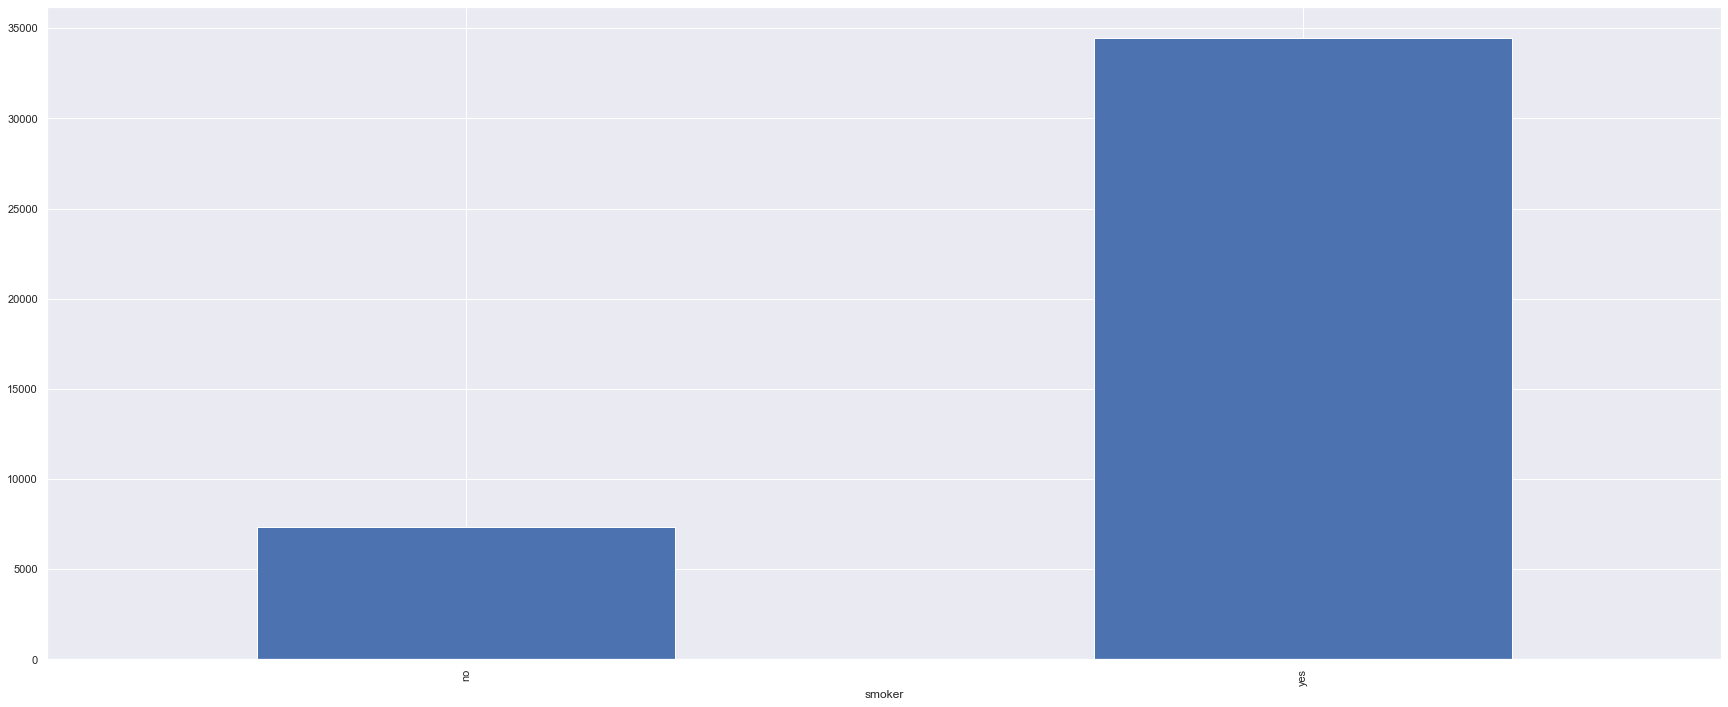

In [48]:
df.groupby("smoker")['expenses'].median().plot.bar()
plt.show()


From the above graph we can say that the customer who smokes more has got more expenses then the customers who dnt smoke.

In [49]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [70]:
df.shape


(1337, 7)